In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
for col in df.columns:
  check_nan = df[col].isnull().values.any()
  print(check_nan)

False
False
False
False
False
False
False
False
False
False
False
False


In [4]:
ChestPainType_le = LabelEncoder()
RestingECG_le = LabelEncoder()
ExerciseAngina_le = LabelEncoder()
ST_Slope_le = LabelEncoder()
Sex_le = LabelEncoder()

df['ChestPainType'] = ChestPainType_le.fit_transform(df['ChestPainType'])
df['RestingECG'] = RestingECG_le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = ExerciseAngina_le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = ST_Slope_le.fit_transform(df['ST_Slope'])
df['Sex'] = Sex_le.fit_transform(df['Sex'])

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [10]:
np.save('Encodings/ChestPainType.npy', ChestPainType_le.classes_)
np.save('Encodings/RestingECG.npy', RestingECG_le.classes_)
np.save('Encodings/ExerciseAngina.npy', ExerciseAngina_le.classes_)
np.save('Encodings/ST_Slope.npy', ST_Slope_le.classes_)
np.save('Encodings/Sex.npy', Sex_le.classes_)

In [5]:
target = df.pop('HeartDisease')
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.33)
N, D = x_train.shape

In [23]:
i = Input(shape = (D, ))
x = Dense(256, activation = 'relu')(i)
x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.2)(x) 
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 150)

Epoch 1/150
20/20 [==============================] - 1s 16ms/step - loss: 4.9916 - accuracy: 0.5642 - val_loss: 1.4233 - val_accuracy: 0.7426
Epoch 2/150
20/20 [==============================] - 0s 8ms/step - loss: 3.1242 - accuracy: 0.6309 - val_loss: 1.2160 - val_accuracy: 0.7228
Epoch 3/150
20/20 [==============================] - 0s 8ms/step - loss: 2.6829 - accuracy: 0.6016 - val_loss: 0.8134 - val_accuracy: 0.7459
Epoch 4/150
20/20 [==============================] - 0s 8ms/step - loss: 1.9648 - accuracy: 0.6423 - val_loss: 1.6228 - val_accuracy: 0.6271
Epoch 5/150
20/20 [==============================] - 0s 8ms/step - loss: 1.5806 - accuracy: 0.6390 - val_loss: 0.9617 - val_accuracy: 0.6898
Epoch 6/150
20/20 [==============================] - 0s 8ms/step - loss: 1.4365 - accuracy: 0.6813 - val_loss: 0.8514 - val_accuracy: 0.6964
Epoch 7/150
20/20 [==============================] - 0s 8ms/step - loss: 1.1548 - accuracy: 0.6325 - val_loss: 0.6136 - val_accuracy: 0.7129
Epoch 8/150


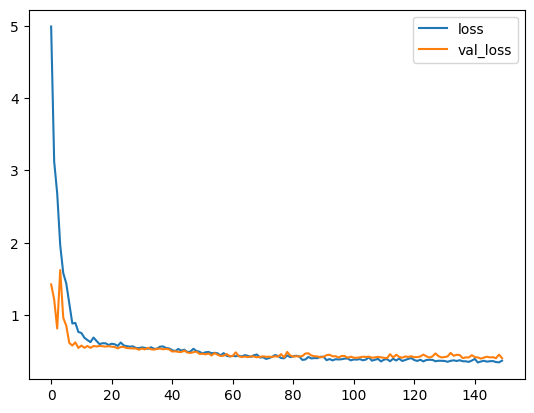

In [25]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

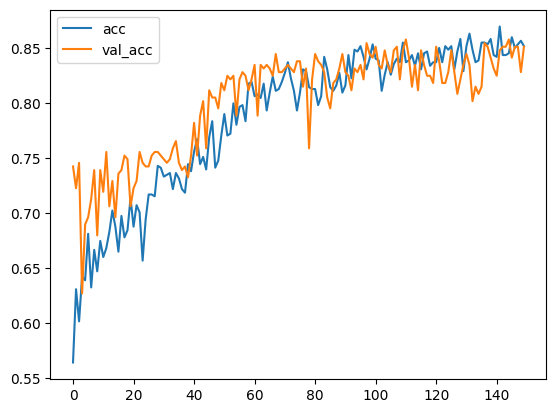

In [26]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [27]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.8515


[0.4026898145675659, 0.8514851331710815]

In [28]:
model.summary()
model.save('Model')

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_15 (Dense)            (None, 256)               3072      
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 69,121
Trainable params: 69,121
Non-trainable